In [1]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from State import State


In [2]:
env = State()
env.create_state([-1,0,0])

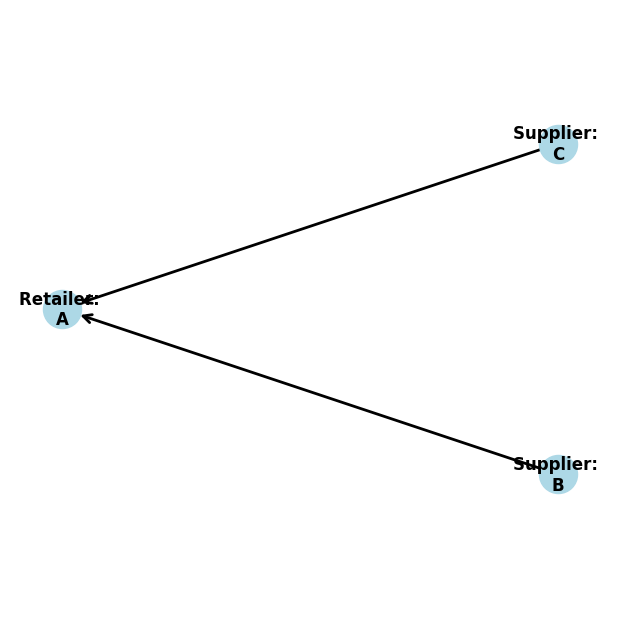

In [3]:
env.show_network()

In [4]:
env.observation_space.sample()

array([ 51, 117, 109, 187], dtype=int64)

In [13]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        print(type(action))
        print("action" + str(action))
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

c:\Users\darry\OneDrive\Desktop\NUS\Astar\Forecasters\RLsrc\Demandable.py:324: RuntimeWarning: invalid value encountered in double_scalars
  return total * self.holding_cost


<class 'numpy.ndarray'>
action[44 61]
time 0: 
A
inv level: {Item(868): 39.0, Item(512): 39.0}
inv pos: {Item(868): 83.0, Item(512): 100.0}
orders: [2.0, Item(868), 44][1.0, Item(512), 61]
total cost: 156.0
holding cost: 156.0
backorder unit: 0.0 backorder cost: 0.0
inv map: {Item(868): Supplier(B), Item(512): Supplier(C)}
unit sold: 26.0 price sold: 259.74
B
inv level: {Item(868): inf}
inv pos: {Item(868): inf}
C
inv level: {Item(512): inf}
inv pos: {Item(512): inf}
[ 83.  39. 100.  39.]
<class 'numpy.ndarray'>
action[ 79 140]
time 1: 
A
inv level: {Item(868): 14.0, Item(512): 75.0}
inv pos: {Item(868): 137.0, Item(512): 215.0}
orders: [2.0, Item(868), 44][2.0, Item(868), 79][4.0, Item(512), 140]
total cost: 178.0
holding cost: 178.0
backorder unit: 0.0 backorder cost: 0.0
inv map: {Item(868): Supplier(B), Item(512): Supplier(C)}
unit sold: 25.0 price sold: 249.75
B
inv level: {Item(868): inf}
inv pos: {Item(868): inf}
C
inv level: {Item(512): inf}
inv pos: {Item(512): inf}
[137.  14.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [14]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=(2,)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [16]:
model = build_model(states, 2)

In [ ]:
model.summary()

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
dqn = build_agent(model, actions)
#dqn.compile(optimizer=Adam(learning_rate=1e-3), metrics=['mae'])
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

In [ ]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))